In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df=pd.read_csv('SA_Aqar.csv');

In [27]:
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [28]:
df.describe()

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3.718000e+03
mean,390.968531,5.064820,5.083916,4.606509,2.243948,0.909360,0.802044,0.495697,0.795320,0.123453,0.560785,0.521517,0.162453,0.802582,0.034158,0.499462,0.814416,0.080958,0.181280,8.738797e+04
std,1565.056135,7.590427,1.230040,0.703449,0.916436,0.287135,0.398512,0.500049,0.403522,0.329001,0.496358,0.499604,0.368915,0.398104,0.181660,0.500067,0.388823,0.272807,0.385302,7.063470e+04
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000e+04
50%,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


# preprocessing

In [29]:
#missing values
df=df.dropna()

In [30]:
#change text data into number
from sklearn.preprocessing import LabelEncoder 

le= LabelEncoder()  
#df['city']= label_encoder_x.fit_transform(df['city'])
#le_name_mapping = dict(zip(label_encoder_x.classes_, label_encoder_x.transform(le.classes_)))

le.fit(df['city'])
le_name_city = dict(zip(le.classes_, le.transform(le.classes_)))
le.fit(df['district'])
le_name_district = dict(zip(le.classes_, le.transform(le.classes_)))
le.fit(df['front'])
le_name_front = dict(zip(le.classes_, le.transform(le.classes_)))
#df['district']= label_encoder_x.fit_transform(df['district'])
#df['front']= label_encoder_x.fit_transform(df['front'])

df.loc[df.price > 70000, 'class'] = 0
#df.loc[(df.price < 70000 & df.price > 50000), 'class'] = 'Medium'
df.loc[df.price <= 70000, 'class'] = 1




In [31]:
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,class
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...,0.0
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...,1.0
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...,1.0
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...,1.0
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...,1.0


In [33]:
le_name_front

{'3 شوارع': 0,
 '4 شوارع': 1,
 'جنوب': 2,
 'جنوب شرقي': 3,
 'جنوب غربي': 4,
 'شرق': 5,
 'شمال': 6,
 'شمال شرقي': 7,
 'شمال غربي': 8,
 'غرب': 9}

In [34]:
le_name_district

{'   حي أحد ': 0,
 '   حي ابحر الجنوبية ': 1,
 '   حي ابحر الشمالية ': 2,
 '   حي اشبيلية ': 3,
 '   حي الأمل ': 4,
 '   حي الاثير ': 5,
 '   حي الاجاويد ': 6,
 '   حي الازدهار ': 7,
 '   حي الاسكان ': 8,
 '   حي الاصالة ': 9,
 '   حي الامواج ': 10,
 '   حي الامير فواز الشمالي ': 11,
 '   حي الاندلس ': 12,
 '   حي الانوار ': 13,
 '   حي البحيرة ': 14,
 '   حي البديعة ': 15,
 '   حي البساتين ': 16,
 '   حي البغدادية الشرقية ': 17,
 '   حي البوادي ': 18,
 '   حي التحلية ': 19,
 '   حي التعاون ': 20,
 '   حي الثقبة ': 21,
 '   حي الجامعة ': 22,
 '   حي الجزيرة ': 23,
 '   حي الجسر ': 24,
 '   حي الجنادرية ': 25,
 '   حي الجوهرة ': 26,
 '   حي الحائر ': 27,
 '   حي الحزام الاخضر ': 28,
 '   حي الحزام الذهبي ': 29,
 '   حي الحزم ': 30,
 '   حي الحمدانية ': 31,
 '   حي الحمراء ': 32,
 '   حي الخالدية ': 33,
 '   حي الخالدية الشمالية ': 34,
 '   حي الخبر الشمالية ': 35,
 '   حي الخزامى ': 36,
 '   حي الخليج ': 37,
 '   حي الدار البيضاء ': 38,
 '   حي الرائد ': 39,
 '   حي الراكة الجنوبية ': 4

In [35]:
le_name_city

{' الخبر': 0, ' الدمام': 1, ' الرياض': 2, ' جدة': 3}

In [37]:
df=df.replace({"city": le_name_city})
df=df.replace({"district": le_name_district})
df=df.replace({"front": le_name_front})

In [38]:
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details,class
0,2,79,6,250,0,5,5,1,1,1,...,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...,0.0
1,2,92,2,370,0,4,5,2,1,1,...,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...,1.0
2,2,92,2,380,0,4,5,1,1,1,...,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...,1.0
3,2,109,9,250,0,5,5,3,0,1,...,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...,1.0
4,2,86,9,400,11,7,5,2,1,1,...,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...,1.0


# split the dataset and feature extraction

In [40]:
#feature extraction
y=df['class']
x= df.drop(['price','details','class'], 1)
#split dataset
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=1) 

# create and train model

In [43]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [44]:
#model for predict prices
y1=df['price']
x1= df.drop(['price','details','class'], 1)

clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(x1, y1)

In [47]:
input_=[2,92,6,250,5,3,3,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0]
clf1.predict([input_])[0]

120000

In [48]:
print(le_name_city)
city_name=input('Enter city number')
print(le_name_district)
district_name=input('Enter district number')
print(le_name_front)
front_name=input('Enter front number')
size=input('Enter size')
property_age=input('Enter property age')
bedrooms=input('Enter number of bedrooms')
bathrooms=input('Enter number of bathrooms')
livingrooms=input('Enter number of livingrooms')
kitchen=input('Enter number of kitchen')
garage=input('Enter number of garage')
driver_room=input('Enter number of driver room')
maid_room=input('Enter number of maid room')
furnished=input('Furnished 0 or 1')
ac=input('AC 0 or 1')
roof=input('Roof 0 or 1')
pool=input('Pool 0 or 1')

frontyard=input('frontyard 0 or 1')
basement=input('basement 0 or 1')
duplex=input('duplex 0 or 1')
stairs=input('stairs 0 or 1')
elevator=input('elevator 0 or 1')
fireplace=input('fireplace 0 or 1')

{' الخبر': 0, ' الدمام': 1, ' الرياض': 2, ' جدة': 3}
Enter city number3
{'   حي أحد ': 0, '   حي ابحر الجنوبية ': 1, '   حي ابحر الشمالية ': 2, '   حي اشبيلية ': 3, '   حي الأمل ': 4, '   حي الاثير ': 5, '   حي الاجاويد ': 6, '   حي الازدهار ': 7, '   حي الاسكان ': 8, '   حي الاصالة ': 9, '   حي الامواج ': 10, '   حي الامير فواز الشمالي ': 11, '   حي الاندلس ': 12, '   حي الانوار ': 13, '   حي البحيرة ': 14, '   حي البديعة ': 15, '   حي البساتين ': 16, '   حي البغدادية الشرقية ': 17, '   حي البوادي ': 18, '   حي التحلية ': 19, '   حي التعاون ': 20, '   حي الثقبة ': 21, '   حي الجامعة ': 22, '   حي الجزيرة ': 23, '   حي الجسر ': 24, '   حي الجنادرية ': 25, '   حي الجوهرة ': 26, '   حي الحائر ': 27, '   حي الحزام الاخضر ': 28, '   حي الحزام الذهبي ': 29, '   حي الحزم ': 30, '   حي الحمدانية ': 31, '   حي الحمراء ': 32, '   حي الخالدية ': 33, '   حي الخالدية الشمالية ': 34, '   حي الخبر الشمالية ': 35, '   حي الخزامى ': 36, '   حي الخليج ': 37, '   حي الدار البيضاء ': 38, '   حي الرائد ':

In [50]:
data=[city_name,district_name,front_name,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,
     furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace]

In [51]:
clf1.predict([data])[0]

140000

# cross validate

In [68]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(clf, x_train, y_train, cv=2,scoring=('r2', 'neg_mean_squared_error'))
sorted(cv_results.keys())

cv_results

{'fit_time': array([0.01899457, 0.01799297]),
 'score_time': array([0.01199818, 0.01600456]),
 'test_r2': array([0.60950671, 0.5242348 ]),
 'test_neg_mean_squared_error': array([-0.0975945 , -0.11890034])}

# performance

In [69]:
y_pred_train=clf.predict(x_train)
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_train)

1.0

In [70]:
y_pred_test=clf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_test)

0.9010989010989011

In [71]:
#mean square error for train
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, y_pred_train,squared=False)

0.0

In [72]:
#mean square error for test
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_test,squared=False)

0.3144854510165755

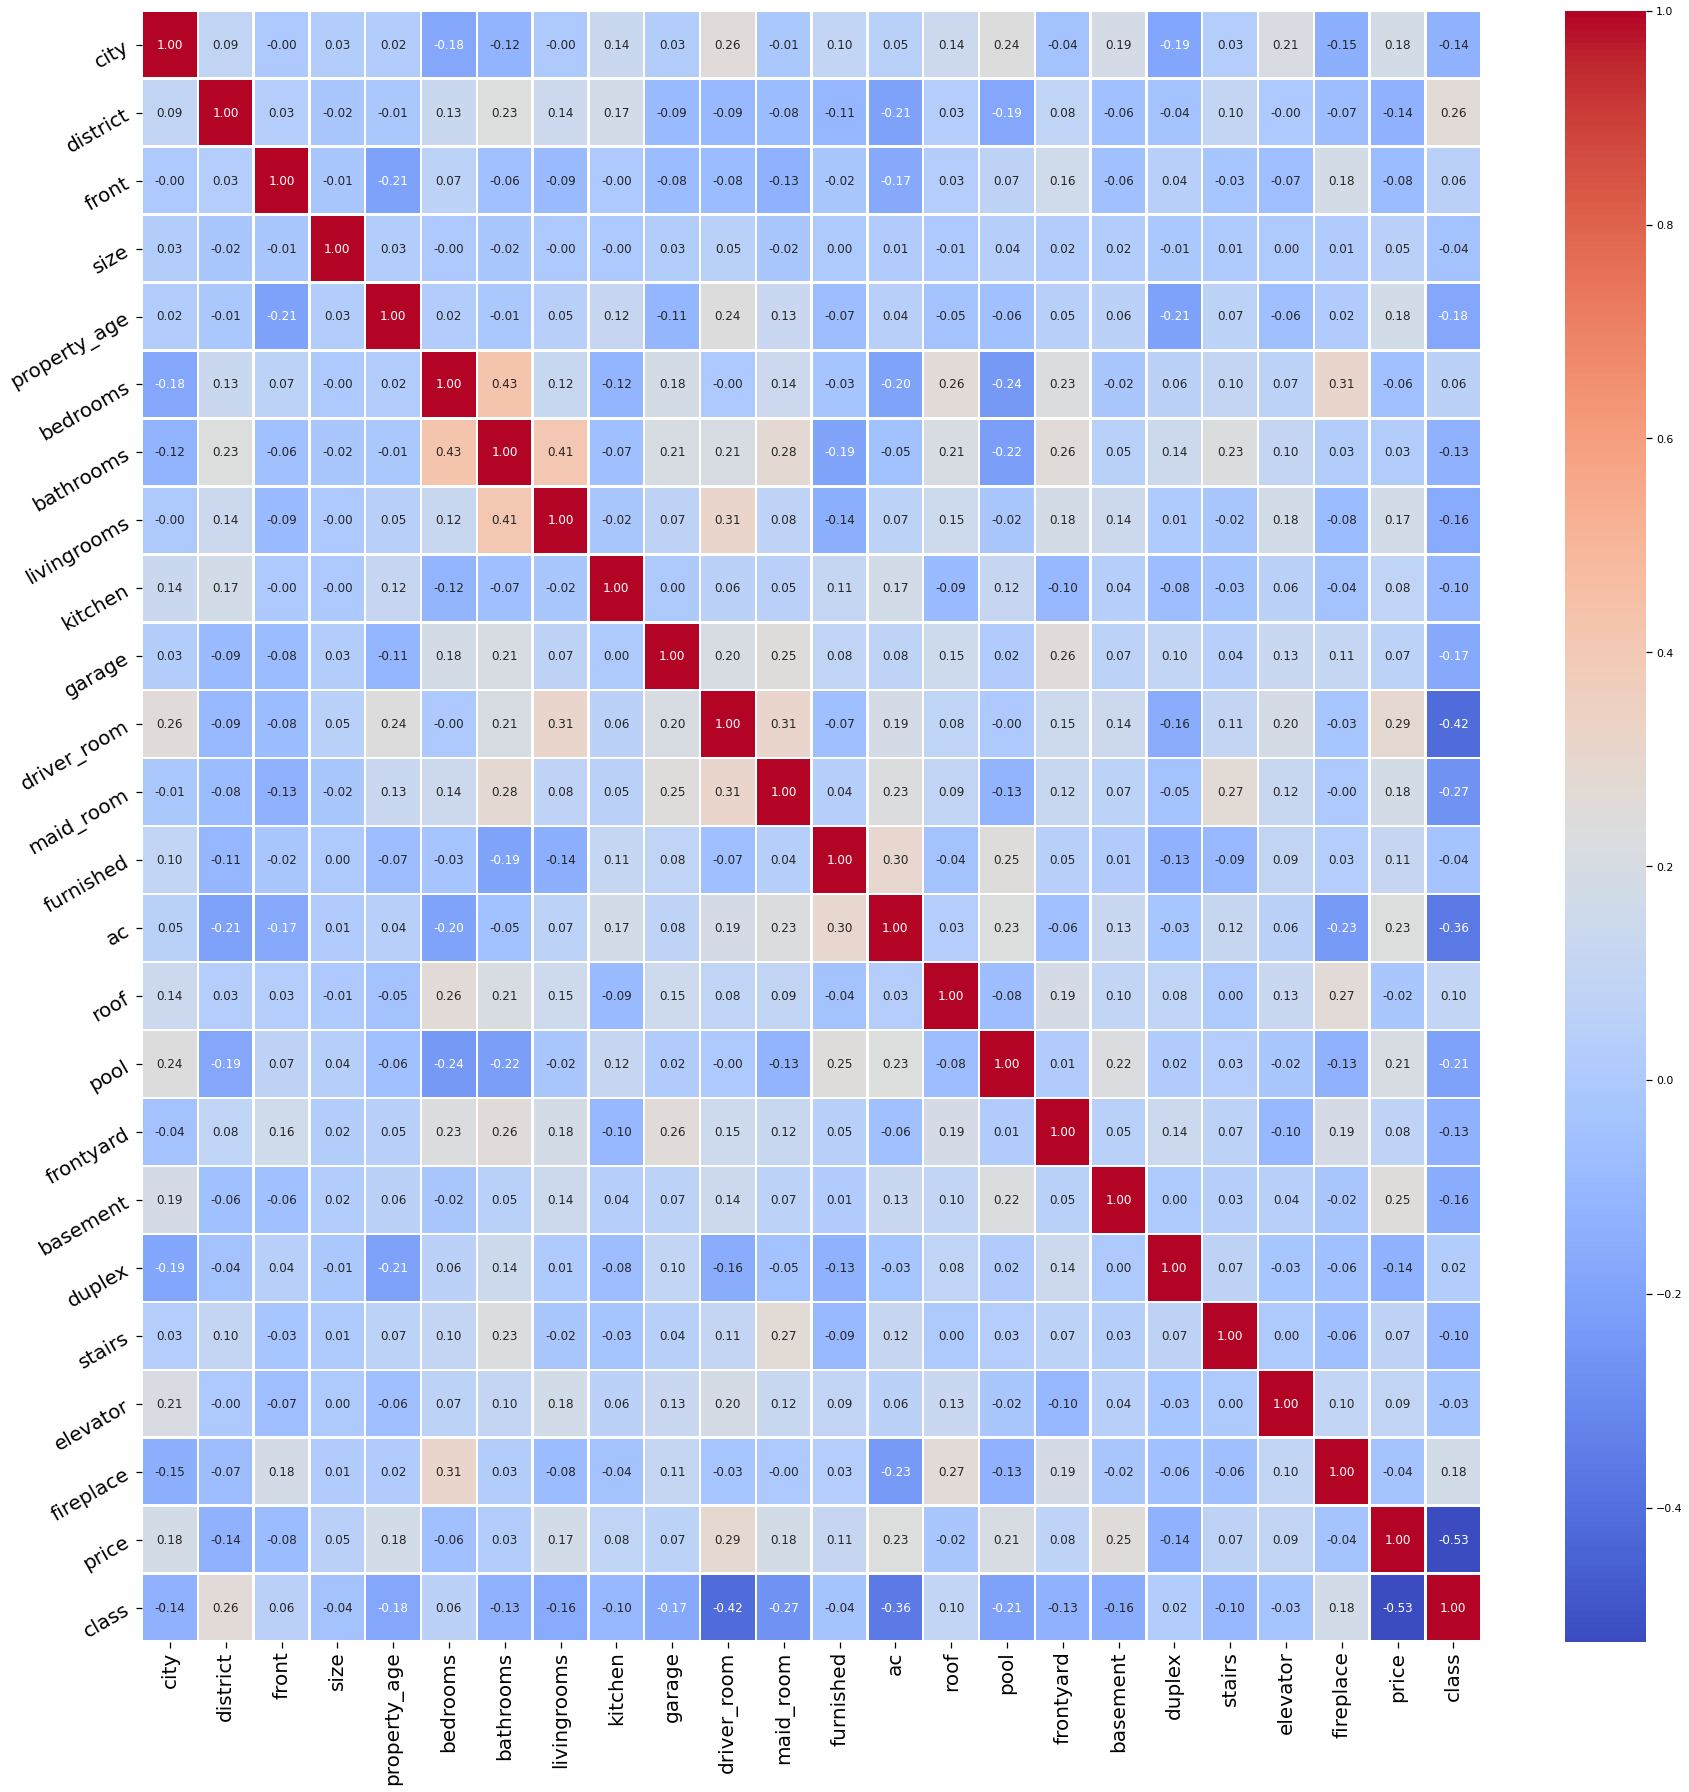

In [73]:
# heatmap of correlation among various attributes


cor=df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.subplots(figsize=(30,30))
p = sns.heatmap(cor, annot=True, lw=1.5, fmt='.2f', cmap='coolwarm')
rotxlabel = p.set_xticklabels(p.get_xticklabels(),fontdict={'fontsize':20}, rotation=90)
rotylabel = p.set_yticklabels(p.get_yticklabels(),fontdict={'fontsize':20}, rotation=30)

In [69]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None)
               
graph = graphviz.Source(dot_data)  
graph 

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH